<a href="https://colab.research.google.com/github/loujjj/Machine-Learning/blob/main/PCT04_Tabor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Classification of Written Digits**

####**Importing the Necessary Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

####**Loading the MNIST Digits Dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

There are 60,000 sample training images of the digits between 0 and 9. Each digit has 28 x 28 pixels.

In [ ]:
X_train.shape

(60000, 28, 28)

Consider the 201st digit in the data set. Here are the pixel values. Zero corresponds to black and 255 corresponds to white.

In [ ]:
X_train[200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 197,
        255,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Here is the 201st label. 

In [ ]:
y_train[200]

1

We now show the image corresponding to the 201st digit. It should show the same digit as the 201st label.

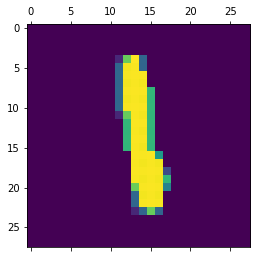

In [ ]:
plt.matshow(X_train[200])

There are 10,000 sample test images of the digits between 0 and 9. Each digit has 28 x 28 pixels.

In [ ]:
X_test.shape

(10000, 28, 28)

Again, here is the 201st test digit.

In [ ]:
X_test[200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79, 109, 255, 253,
        253, 253, 255, 253, 253, 170,  63,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 105, 242, 252, 253, 252,
        252, 252, 253, 252, 252, 252, 176,  10,   0,   0,   0,   0,   0,
          0,   0],
       [  

Here is the corresponding 201st label of the test digit.

In [ ]:
y_test[200]

3

We can see that the image shown is the same as the 201st label. 

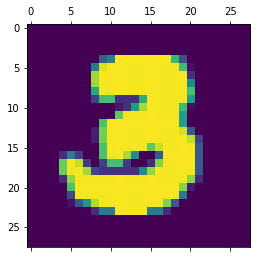

In [ ]:
plt.matshow(X_test[200])

#####**Preparing the Data**

Let's scale the data to improve the accuracy.

In [ ]:
X_train = X_train/255
X_test = X_test/255

Then, let's take a look at the dimensions of $X\_train$ and $X\_test$.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


We want to convert the each of the 28 x 28 image array to a 1 x 784 array. Each of these flattened images will serve as the input layer to the neural network. We do this by using the $reshape$ command.

In [ ]:
X_train_flat = X_train.reshape(len(X_train),28*28)
X_test_flat = X_test.reshape(len(X_test),28*28)

Now, let's take a look at the dimensions of $X\_train$ and $X\_test$.

In [ ]:
print(X_train_flat.shape)
print(X_test_flat.shape)

(60000, 784)
(10000, 784)


####**Defining the model**

In [ ]:
model = Sequential([
    keras.layers.Input(shape = (784,)),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


####**Compiling the model**

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              # loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

####**Training the model**

In [ ]:
history = model.fit(X_train_flat, y_train, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4116 - accuracy: 0.8934
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2012 - accuracy: 0.9424
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1504 - accuracy: 0.9569
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1186 - accuracy: 0.9660
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0975 - accuracy: 0.9718
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0814 - accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0690 - accuracy: 0.9804
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591 - accuracy: 0.9836
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9858
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.043

####**Evaluating the performance**

In [ ]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0799 - accuracy: 0.9756


[0.07994130998849869, 0.975600004196167]

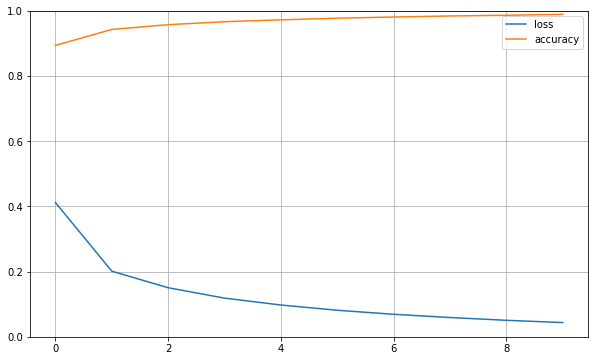

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
prediction = model.predict(X_test_flat)
print(prediction)

313/313 [==============================] - 1s 2ms/step
[[8.22828099e-08 1.34483616e-06 3.67311668e-06 ... 9.99755025e-01
  7.71451482e-07 3.09856150e-05]
 [3.48817994e-05 9.07249632e-04 9.98969257e-01 ... 1.09707066e-09
  7.09272172e-07 6.47076392e-09]
 [8.97679442e-08 9.99565244e-01 8.38789420e-05 ... 2.25262353e-04
  9.22887484e-05 1.48401807e-06]
 ...
 [9.50631796e-10 6.48319398e-09 4.67204160e-08 ... 2.62065325e-04
  6.74558169e-06 1.97225439e-04]
 [3.43656801e-08 5.77154481e-07 6.35695052e-09 ... 6.81910564e-08
  9.63936764e-05 7.94573083e-08]
 [6.98164649e-06 1.06114015e-08 1.06336147e-05 ... 1.85847611e-07
  4.43448300e-08 3.19833617e-08]]


In [ ]:
print(prediction[9999])

[6.98164649e-06 1.06114015e-08 1.06336147e-05 7.59951533e-08
 8.85517784e-06 5.99607229e-05 9.99913156e-01 1.85847611e-07
 4.43448300e-08 3.19833617e-08]


In [ ]:
np.argmax(prediction[9999])

6

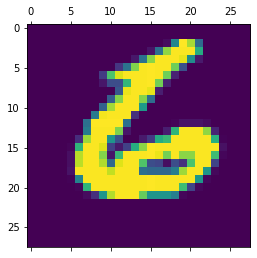

In [ ]:
plt.matshow(X_test[9999])

In [ ]:
predicted_labels = [np.argmax(i) for i in prediction]

In [ ]:
cm = confusion_matrix(y_test, prediction.argmax(axis=1))
print(cm)

[[ 971    0    2    1    0    2    3    1    0    0]
 [   0 1125    2    2    0    1    2    1    2    0]
 [   4    1 1006    1    1    1    2    8    8    0]
 [   0    0    5  988    0    3    0    5    3    6]
 [   0    0    5    1  963    0    3    1    2    7]
 [   3    0    0   11    3  863    5    2    3    2]
 [   7    3    2    1    2    4  935    0    4    0]
 [   1    3    8    8    3    0    0  996    1    8]
 [   7    2    3    4    5    3    3    5  940    2]
 [   3    5    0    7   14    3    0    8    0  969]]


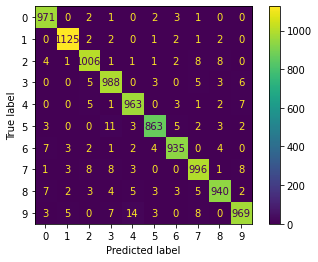

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Text(69.0, 0.5, 'True Label')

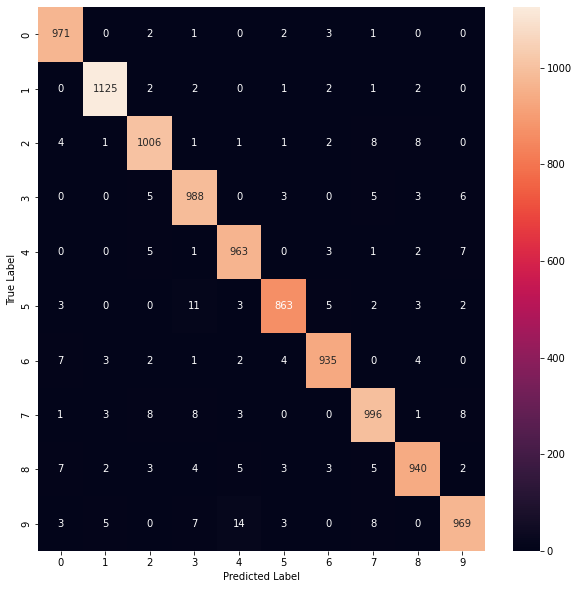

In [ ]:
# Alternative Code for Displaying Confusion Matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
accuracy = 100*np.trace(cm)/np.sum(cm)
print(accuracy)

97.56
